这是一份用户消费行为的分析报告  
数据来源于网上，是用户在一家CD网站上的消费记录

In [1]:
import pandas as pd  
import numpy as np 

columns=['user_id','order_dt','order_products','order_amount']
df=pd.read_table('CDNOW_master.txt',names=columns,sep='\s+')

+ user_id：用户ID  
- order_dt:购买日期  
- order_prodects：购买产品数  
- order_amount：购买金额

In [2]:
df.head()

,user_id,order_dt,order_products,order_amount
0,1,19970101,1,11.77
1,2,19970112,1,12.00
2,2,19970112,5,77.00
3,3,19970102,2,20.76
4,3,19970330,2,20.76


In [3]:
df.describe()

,user_id,order_dt,order_products,order_amount
count,69659.000000,6.965900e+04,69659.000000,69659.000000
mean,11470.854592,1.997228e+07,2.410040,35.893648
std,6819.904848,3.837735e+03,2.333924,36.281942
min,1.000000,1.997010e+07,1.000000,0.000000
25%,5506.000000,1.997022e+07,1.000000,14.490000
50%,11410.000000,1.997042e+07,2.000000,25.980000
75%,17273.000000,1.997111e+07,3.000000,43.700000
max,23570.000000,1.998063e+07,99.000000,1286.010000


+ 大部分订单只消费了少量商品（平均2.4），有一定值干扰  
+ 用户的消费金额比较稳定，平均消费35元，中位数在35元，有一定极值的干扰

In [4]:
df['order_dt']=pd.to_datetime(df.order_dt,format="%Y%m%d")
df['month']=df.order_dt.values.astype('datetime64[M]')

- 对时间进行解析，一开始默认的格式是 int64的，可以用 df.info() 来查看,默认会是 datetime64[ns] 类型，后面中括号表示 时间间隔是 ns
- 下面是对 order_dt 列（取values），转换类型为datetime64[M]，默认就会是每月的第一天了，同理设置为[Y]就是每年的1月1日，然后生成新的一列 month

## 1.进行用户消费趋势的分析（按月）
- 每月的消费总金额
- 每月的消费次数
- 每月的产品购买量
- 每月的消费人数

In [5]:
grouped_month=df.groupby('month')
order_month_amount=grouped_month.order_amount.sum()
order_month_amount.head()

month
1997-01-01    299060.17
1997-02-01    379590.03
1997-03-01    393155.27
1997-04-01    142824.49
1997-05-01    107933.30
Name: order_amount, dtype: float64

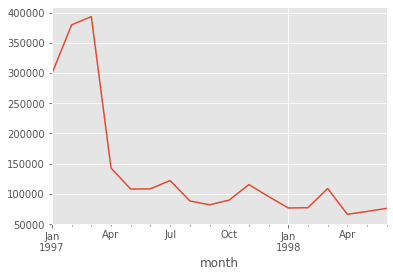

In [6]:
#加载数据可视化包
import matplotlib.pyplot as plt
#可视化显示在页面
%matplotlib inline
#更改设计风格
plt.style.use('ggplot')
order_month_amount.plot()

由上图可知，消费金额在前三个月达到最高峰，后续消费较为稳定，有轻微下降趋势

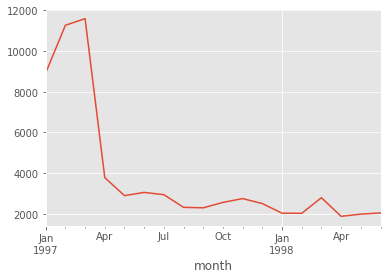

In [7]:
grouped_month.user_id.count().plot()

In [8]:
type(grouped_month.user_id.count())

pandas.core.series.Series

前三个月消费订单人数在10000笔作于，后续月份的平均消费人数则在2500人

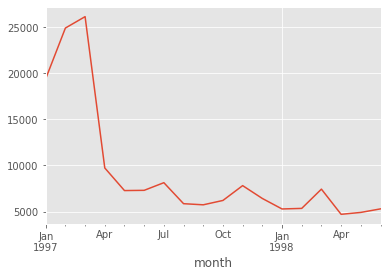

In [9]:
grouped_month.order_products.sum().plot()

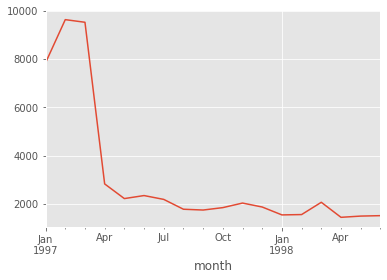

In [10]:
# 这里 x 其实是一个数组，是每月分组的用户id，去重后求数组的 len 长度就代表每月的用户数
df.groupby('month').user_id.apply(lambda x:len(x.drop_duplicates())).plot()

去重的方法有多种，这里也可以使用数据库思想，df.groupby(['month','user_id']).count().reset_index()  
每月消费人数低于每月消费次数，但差异不大  
前三个月每月的消费人数在8000-10000之间，后续月份，平均消费人数在2000不到

In [11]:
df.groupby(['month','user_id']).count().reset_index()

,month,user_id,order_dt,order_products,order_amount
0,1997-01-01,1,1,1,1
1,1997-01-01,2,2,2,2
2,1997-01-01,3,1,1,1
3,1997-01-01,4,2,2,2
4,1997-01-01,5,2,2,2
...,...,...,...,...,...
55374,1998-06-01,23444,1,1,1
55375,1998-06-01,23489,1,1,1
55376,1998-06-01,23513,1,1,1
55377,1998-06-01,23555,1,1,1


In [12]:
# 上面进行的汇总分析，其实可以用数据透视的方法更快实现，一次性求出结果
df.pivot_table(index='month',
              values=['order_products','order_amount','user_id'],
              aggfunc={'order_products':'sum',
                      'order_amount':'sum',
                      'user_id':'count'}).head()

,order_amount,order_products,user_id
month,,,
1997-01-01,299060.17,19416,8928
1997-02-01,379590.03,24921,11272
1997-03-01,393155.27,26159,11598
1997-04-01,142824.49,9729,3781
1997-05-01,107933.30,7275,2895


#### 练习：
1 每月用户平均消费金额的趋势
  df.groupby("month").order_amount.mean().plot()

2 每月用户平均消费次数的趋势

In [13]:
times = df.groupby('month').user_id.count()
person_num = df.groupby('month').user_id.apply(lambda x: len(x.drop_duplicates()))
times/person_num

month
1997-01-01    1.137905
1997-02-01    1.170144
1997-03-01    1.217766
1997-04-01    1.339830
1997-05-01    1.307588
1997-06-01    1.305686
1997-07-01    1.349541
1997-08-01    1.309255
1997-09-01    1.320299
1997-10-01    1.393148
1997-11-01    1.356016
1997-12-01    1.343348
1998-01-01    1.322056
1998-02-01    1.306254
1998-03-01    1.355825
1998-04-01    1.306889
1998-05-01    1.334005
1998-06-01    1.356574
Name: user_id, dtype: float64

## 2.用户个体消费分析
- 用户消费金额，消费次数的描述统计：describe()
- 用户消费金额和消费次数的散点图
- 用户消费金额的分布图
- 用户消费次数的分布图
- 用户累计消费金额占比（百分之多少的用户占了百分之多少的消费额）

In [14]:
df.columns

Index(['user_id', 'order_dt', 'order_products', 'order_amount', 'month'], dtype='object')

In [15]:
grouped_user=df.groupby('user_id')

In [16]:
# 用户消费金额，消费次数的描述统计：describe()
grouped_user.sum().describe()

,order_products,order_amount
count,23570.000000,23570.000000
mean,7.122656,106.080426
std,16.983531,240.925195
min,1.000000,0.000000
25%,1.000000,19.970000
50%,3.000000,43.395000
75%,7.000000,106.475000
max,1033.000000,13990.930000


##### 分析：
- 用户平均购买了7张CD，但是中位值只有3，说明小部分用户购买了大量的CD
- 用户平均消费106元，中位值有43，判断同上，有极值干扰

### 用户消费金额和消费的散点图

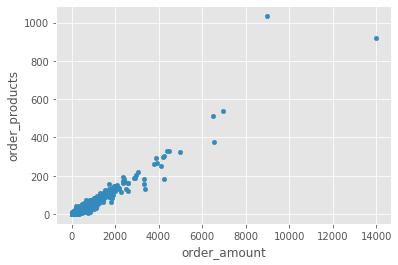

In [17]:
grouped_user.sum().plot.scatter(x='order_amount',y='order_products')
#等同于：
#grouped_user.sum().plot(x="order_amount", y="order_products", kind="scatter")

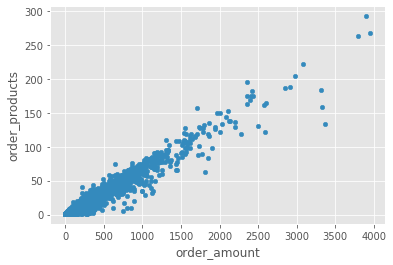

In [18]:
# 过滤极值
grouped_user.sum().query('order_amount<4000').plot.scatter(x='order_amount',y='order_products')

#### 消费金额的分布图

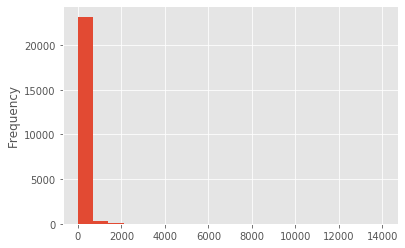

In [19]:
# 直方图，分为20块
grouped_user.sum().order_amount.plot.hist(bins=20)

分析：

从直方图可知，用户消费金额，绝大部分呈现集中趋势，小部分异常值干扰了判断，可以使用过滤操作排除异常

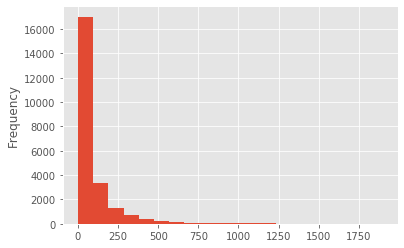

In [20]:
# 直方图，分为20块，过滤买了大量商品的订单
grouped_user.sum().query('order_products<100').order_amount.plot.hist(bins=20)

使用切比雪夫定理过滤掉异常值，因为切比雪夫定理说明，95%的数据都分布在5个标准差之内，剩下5%的极值就不要了

#### 用户累计消费金额占比（百分之多少的用户占了百分之多少的消费额度）

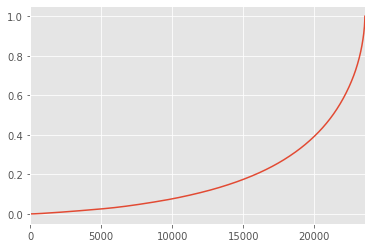

In [21]:
# cumsum 是求累加值
user_cumsum=grouped_user.sum().sort_values('order_amount').apply(lambda x:x.cumsum()/x.sum())

# 这里 reset_index() 是为了得到一个自然数的x行标签，表示的就是人数，如果不用这个方法，图很难看。
# 下面的图就可以看出来多少个少占多少百分比
user_cumsum.reset_index().order_amount.plot()

按照用户消费金额进行升序排序，由图可以知道50%的用户仅贡献了15%的消费额度，而排名前5000的用户就贡献了40%的消费额度

## 3.用户消费行为
- 统计每日有多少首次消费客户
- 统计用户最后一次消费： （客户流失情况分析）
- 新老客户消费比
 - 多少用户仅消费一次
 - 每月新客占比
- 用户分层
 - RFM模型
 - 新、老、活跃、回流、流失
- 用户购买周期（按订单）
 - 用户消费周期描述
 - 用户消费周期分布
- 用户生命周期（按第一次和最后一次消费）
 -用户生命周期描述
 - 用户生命周期分布

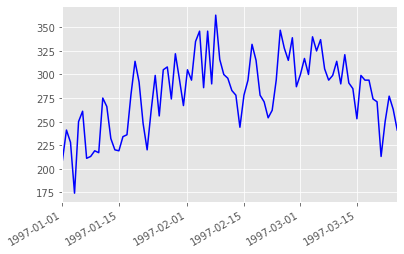

In [22]:
# 用户分组 
# min()得到最小的日期（用户第一次消费日期）
# 统计一下各个日期的数量：即每日有多少首次消费的客户。
grouped_user.min().order_dt.value_counts().plot(color="blue")

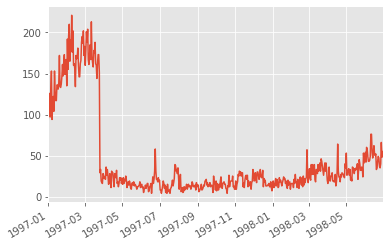

In [23]:
# 得到最大的日期，然后统计一下各个日期的个数，得到最后一次消费的情况，用户流失
grouped_user.max().order_dt.value_counts().plot()

1. 断崖式下跌很正常：可以理解用户流失比例基本一致，一开始用户迅猛增长数量比较多流失的也比较多，后面没有用户。。。用户最后一次购买的分布比第一次分布广。
2. 大部分最后一次购买，集中在前三个月，说明很多用户购买了一次后就不再进行购买。  
3. 随着时间的递增，最后一次购买数量也在递增，消费呈现流失上升的状况（这也是正常，随着时间的增长，可能运营没跟上，或者用户忠诚度下降了）

##### 新老客消费比

In [24]:
# 得到第一次和最后yc次消费情况，如果 min、max 日期相同，说明只消费了一次
user_life=grouped_user.order_dt.agg(['min','max'])
user_life.head()

,min,max
user_id,,
1,1997-01-01,1997-01-01
2,1997-01-12,1997-01-12
3,1997-01-02,1998-05-28
4,1997-01-01,1997-12-12
5,1997-01-01,1998-01-03


In [25]:
# 统计只消费了一次的用户
(user_life['min']==user_life['max']).value_counts()

True     12054
False    11516
dtype: int64

分析结论：有一半的用户，只消费了一次

#### 用户分层
1. RFM模型

In [26]:
# 画 RFM，先对原始数据进行透视
rfm=df.pivot_table(index='user_id',
                  values=['order_products','order_amount','order_dt'],
                  aggfunc={'order_dt':'max',
                          'order_amount':'sum',
                          'order_products':'sum'})
rfm.head()

,order_amount,order_dt,order_products
user_id,,,
1,11.77,1997-01-01,1
2,89.00,1997-01-12,6
3,156.46,1998-05-28,16
4,100.50,1997-12-12,7
5,385.61,1998-01-03,29


In [27]:
# 计算用户最后一次消费距今天有多少天。
# 因为数据样本的时间太久远，就随便用的max值来代替today。
rfm['R']= (rfm.order_dt.max() - rfm.order_dt)/np.timedelta64(1,'D')
rfm.R.head()
# 分子得到的是一些天数类似 545 days（因为是时间格式相减)
# 分母是时间单位1D，目的是去掉时间单位。

user_id
1    545.0
2    534.0
3     33.0
4    200.0
5    178.0
Name: R, dtype: float64

关于Datetime和Timedelta算法：
https://docs.scipy.org/doc/numpy/reference/arrays.datetime.html
对datetime64数据类型的数学运算，返回timedelta64数据类型的数据。

In [28]:
# 例子：
np.datetime64('2009-01-01') - np.datetime64('2008-01-01')

numpy.timedelta64(366,'D')

In [29]:
# 重命名
# R ：距今消费时间  M：消费金额  F：消费频次
rfm.rename(columns={'order_products':"F",'order_amount':'M'},inplace=True)

In [30]:
rfm.head()

,M,order_dt,F,R
user_id,,,,
1,11.77,1997-01-01,1,545.0
2,89.00,1997-01-12,6,534.0
3,156.46,1998-05-28,16,33.0
4,100.50,1997-12-12,7,200.0
5,385.61,1998-01-03,29,178.0


In [31]:
def rfm_func(x):
    level=x.apply(lambda x:'1' if x>=0 else '0')
    # level 的类型是 series，index 是 R、F、M
    # print(type(level))
    label=level.R + level.F + level.M
    d={
        # R 为1 表示离均值较远即时间很久，M为1 表示 消费金额比较多，F为1 表示消费频次比较多，所以是重要价值客户
        '111':'重要价值客户',  #星级客户。
        '011':'重要保持客户',  #这类客户，消费金额和频次都很高，但很久没来消费了。
        '101':'重要发展客户',  #这类客户，近期消费过，但频次较低。
        '001':'重要挽留客户',  #这类客户，只是消费金额高，很久未消费过。
        '110':'一般价值客户',  #这类客户，近期消费过，频率也高，但消费金额低。
        '010':'一般保持客户',  #这类客户，优点只是曾经消费频次高于均值。很久没来消费了。
        '100':'一般发展客户',  #这类客户，近期消费过，但频率和金额都低于均值。
        '000':'一般挽留客户',
    }
    result=d[label]
    return result

# 注意这里是要一行行的传递进来，所以 axis=1，传递一行得到一个 111，然后匹配返回一个值
rfm['label']=rfm[['R','F','M']].apply(lambda x:x-x.mean()).apply(rfm_func,axis=1)

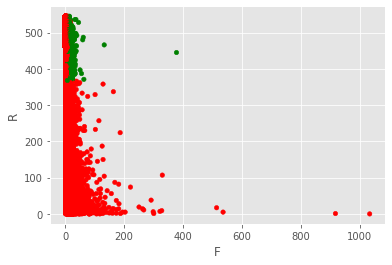

In [32]:
rfm.loc[rfm.label=='重要价值客户','color']='green'
rfm.loc[rfm.label !='重要价值客户','color']='red' #~符合也代表“不等于”
# 使用F和R看消费频率和最近一次消费情况
rfm.plot.scatter('F','R',c=rfm.color)

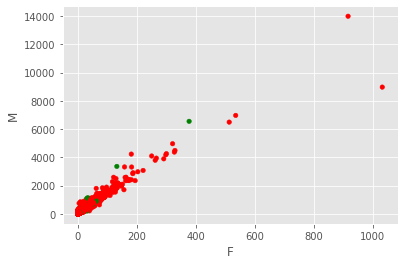

In [33]:
# 使用F和M看消费频率和消费金额
rfm.plot.scatter('F','M',c=rfm.color)

In [34]:
rfm.groupby('label').sum()

,M,F,R
label,,,
一般价值客户,7181.28,650,36295.0
一般保持客户,19937.45,1712,29448.0
一般发展客户,438291.81,29346,6951815.0
一般挽留客户,196971.23,13977,591108.0
重要价值客户,167080.83,11121,358363.0
重要保持客户,1592039.62,107789,517267.0
重要发展客户,33028.40,1263,114482.0
重要挽留客户,45785.01,2023,56636.0


从RFM 分层可知，大部分用户欸重要保持客户，但是这是由于极值的影响，所以 RFM 的划分标准应该以业务为准，也可以通过切比雪夫去除极值后求均值，并且 RFM 的各个划分标准可以都不一样
- 尽量用小部分的用户覆盖大部分的额度
- 不要为了数据好看划分等级

#### 用户生命周期
新客，活跃，回流，流失（一段时间不消费，或者不活跃）

pivot_table
- index按照user_id进行分组；
- values是order_dt.count()即每个用户有多少天消费行为。
- columns:进一步分组，在用户分组的基础上，对每天进行分组

In [35]:
# 数据透视， userid为索引，月为列，求每月的消费次数，这里填充了
pivoted_counts=df.pivot_table(index='user_id',
                             columns='month',
                             values='order_dt',
                             aggfunc='count').fillna(0)
pivoted_counts.head()

month,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
user_id,,,,,,,,,,,,,,,,,,
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0


In [36]:
# 其实就是2层分组：
pivoted_counts.stack()

user_id  month     
1        1997-01-01    1.0
         1997-02-01    0.0
         1997-03-01    0.0
         1997-04-01    0.0
         1997-05-01    0.0
                      ... 
23570    1998-02-01    0.0
         1998-03-01    0.0
         1998-04-01    0.0
         1998-05-01    0.0
         1998-06-01    0.0
Length: 424260, dtype: float64

In [37]:
# 转变一下消费，有消费为1，没有消费为0
# applymap针对每个元素操作。
df_purchase=pivoted_counts.applymap(lambda x:1 if x>0 else 0)
df_purchase.tail()

month,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
user_id,,,,,,,,,,,,,,,,,,
23566,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
23567,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
23568,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
23569,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
23570,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [39]:
def active_status(data):
    #用变量status记录用户每月的状态：未注册/新用户/活跃用户/非活跃用户
    status=[]
    # 数据一共有18个月份，每次输入一行数据，这样进行逐月判断
    for i in range(18):
        if data[i]==0: #未消费
            if len(status) == 0: #并且无状态记录，则代表用户未注册。
                status.append('unreg')
            else:
                if status[i-1] == "unreg": #有状态记录，是未注册用户
                    status.append('unreg')  #本月未消费，仍视为未注册用户
                else:
                    status.append('unactive')#已注册用户，本月未消费，则标记“非活跃用户”
        # 若本月消费
        else:          
            if len(status) == 0: #之前无状态记录，代表是本月新增用户
                status.append('new')
            else:                #之前有状态记录
                if status[i-1] == "unactive": #属于“非活跃用户”
                    status.append('return')    #标记”返回用户“
                elif status[i-1] == "unreg":   #属于“未注册用户”
                    status.append('new')       #标记“新增用户”
                else:
                    status.append("active")    #标记“活跃用户”
    return status
                

In [68]:
# 这里由于进行数据透视，填充了一些 null 值为0，而实际可能用户在当月根本就没有注册，
#这样会误导第一次消费数据的统计，所以写一个函数来处理
def active_status1(data):
    status=[]
    # 数据一共有18个月份，每次输入一行数据，这样进行逐月判断
    for i in range(18):
        # 若本月没有消费，上面处理过的结果
        if data[i]==0:
            if len(status)>0:
                if status[i-1]=='unreg':
                    status.append('unreg')
                else:
                    status.append('unactive')
            else:
                # 之前一个数据都没有，就认为是未注册
                status.append('unreg')
                
        # 若本月消费
        else:
            if len(status)==0:
                status.append('new')
            else:
                if status[i-1]=='unactive':
                    status.append('return')
                elif status[i-1]=='unreg':
                    status.append('new')
                else:
                    status.append('active')
    return status
                   

若本月没有消费，这里只是和上个月判断是否注册，有缺陷，可以判断是否存在就可以了
- 若之前是未注册，则依旧为未注册
- 若之前有消费，则为流失/不活跃
- 其他情况，为未注册

若本月有消费
- 若是第一次消费，则为新用户
- 如果之前有过消费，则上个月为不活跃，则为回流
- 如果上个月为未注册，则为新用户
- 初次之外，为活跃

return:回流
new:新客
unreg:未注册
active:活跃

主流写法还是使用 etl ，不是通过透视表

In [77]:
purchase_stats=df_purchase.apply(active_status,axis=1)
purchase_stats.head()
# 但是这样不是在df_purchase内直接改变values。

user_id
1    [new, unactive, unactive, unactive, unactive, ...
2    [new, unactive, unactive, unactive, unactive, ...
3    [new, unactive, return, active, unactive, unac...
4    [new, unactive, unactive, unactive, unactive, ...
5    [new, active, unactive, return, active, active...
dtype: object

In [96]:
# 把list转换为series,index使用month。
pd.Series(purchase_stats.loc[30], index=df_purchase.columns)

month
1997-01-01         new
1997-02-01      active
1997-03-01    unactive
1997-04-01    unactive
1997-05-01    unactive
1997-06-01    unactive
1997-07-01    unactive
1997-08-01    unactive
1997-09-01    unactive
1997-10-01    unactive
1997-11-01    unactive
1997-12-01    unactive
1998-01-01    unactive
1998-02-01    unactive
1998-03-01    unactive
1998-04-01    unactive
1998-05-01    unactive
1998-06-01    unactive
dtype: object

In [100]:
# 所以使用这条语句可以转换df_purchase的值。
# 数据蛙助教说是np,pd的版本问题导致的。
purchase_stats = df_purchase.apply(lambda x : pd.Series(active_status(x), index=df_purchase.columns), axis=1)
purchase_stats


month,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
user_id,,,,,,,,,,,,,,,,,,
1,new,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive
2,new,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive
3,new,unactive,return,active,unactive,unactive,unactive,unactive,unactive,unactive,return,unactive,unactive,unactive,unactive,unactive,return,unactive
4,new,unactive,unactive,unactive,unactive,unactive,unactive,return,unactive,unactive,unactive,return,unactive,unactive,unactive,unactive,unactive,unactive
5,new,active,unactive,return,active,active,active,unactive,return,unactive,unactive,return,active,unactive,unactive,unactive,unactive,unactive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23566,unreg,unreg,new,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive
23567,unreg,unreg,new,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive
23568,unreg,unreg,new,active,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive


In [101]:
# 这里把未注册的替换为空值，这样 count 计算时不会计算到
# 得到每个月的用户分布
purchase_stats_ct= purchase_stats.replace('unreg',np.NaN).apply(lambda x:pd.value_counts(x))
purchase_stats_ct

month,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
active,NaN,1157.0,1681,1773.0,852.0,747.0,746.0,604.0,528.0,532.0,624.0,632.0,512.0,472.0,571.0,518.0,459.0,446.0
new,7846.0,8476.0,7248,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
return,NaN,NaN,595,1049.0,1362.0,1592.0,1434.0,1168.0,1211.0,1307.0,1404.0,1232.0,1025.0,1079.0,1489.0,919.0,1029.0,1060.0
unactive,NaN,6689.0,14046,20748.0,21356.0,21231.0,21390.0,21798.0,21831.0,21731.0,21542.0,21706.0,22033.0,22019.0,21510.0,22133.0,22082.0,22064.0


In [102]:
# 又把null 值填充为0
purchase_stats_ct.fillna(0).T

,active,new,return,unactive
month,,,,
1997-01-01,0.0,7846.0,0.0,0.0
1997-02-01,1157.0,8476.0,0.0,6689.0
1997-03-01,1681.0,7248.0,595.0,14046.0
1997-04-01,1773.0,0.0,1049.0,20748.0
1997-05-01,852.0,0.0,1362.0,21356.0
1997-06-01,747.0,0.0,1592.0,21231.0
1997-07-01,746.0,0.0,1434.0,21390.0
1997-08-01,604.0,0.0,1168.0,21798.0
1997-09-01,528.0,0.0,1211.0,21831.0


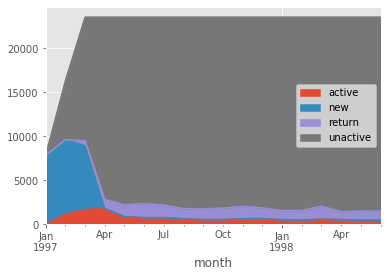

In [104]:
# 绘制了一个面积图，蓝色是注册用户

purchase_stats_ct.fillna(0).T.plot.area()

In [107]:
# 求出每个月的各类用户的占比
# 1月，只有new客户，所以值是1.00
purchase_stats_ct.fillna(0).T.apply(lambda x:x/x.sum(),axis=1)

,active,new,return,unactive
month,,,,
1997-01-01,0.000000,1.000000,0.000000,0.000000
1997-02-01,0.070886,0.519299,0.000000,0.409815
1997-03-01,0.071319,0.307510,0.025244,0.595927
1997-04-01,0.075223,0.000000,0.044506,0.880272
1997-05-01,0.036148,0.000000,0.057785,0.906067
1997-06-01,0.031693,0.000000,0.067543,0.900764
1997-07-01,0.031650,0.000000,0.060840,0.907510
1997-08-01,0.025626,0.000000,0.049555,0.924820
1997-09-01,0.022401,0.000000,0.051379,0.926220


由此可知：
- 活跃用户，对应的是消费运营的质量
- 回流用户，之前不消费本月才消费，对应的是换回运营
- 不活跃用户， 对应流失

##### 用户购买周期分析：

GroupBy.apply(self, func): 
1. 传入的第一个参数是一个dataframe类型数据，
2. 第二个参数是处理第一个参数的函数。
3. 最后返回一个DataFrame或Series/scalar。
4. 最后，apply函数会把所有的返回值联合在一起，存入一个单一的dataframe或series.
所以说apply是一个高度灵活的分组方法。

In [48]:
# 用户购买周期（按订单）
# 计算相邻两个订单的时间间隔，shift(period=1)函数是对数据进行错位，
# ,所有数据根据参数设置会往下平移n行。
order_diff=grouped_user.apply(lambda x:x.order_dt-x.order_dt.shift())
order_diff.head(10)


user_id   
1        0        NaT
2        1        NaT
         2     0 days
3        3        NaT
         4    87 days
         5     3 days
         6   227 days
         7    10 days
         8   184 days
4        9        NaT
Name: order_dt, dtype: timedelta64[ns]

In [49]:
# 下面是解释shift()方法的例子：
a1 = df.order_dt.head()
a1

0   1997-01-01
1   1997-01-12
2   1997-01-12
3   1997-01-02
4   1997-03-30
Name: order_dt, dtype: datetime64[ns]

In [50]:
a2 = df.order_dt.shift().head()
a2

0          NaT
1   1997-01-01
2   1997-01-12
3   1997-01-12
4   1997-01-02
Name: order_dt, dtype: datetime64[ns]

In [51]:
#⚠️这类返回的格式是timedelta64，凡事日期数据进行算数运算都会返回timedelta格式的数据
a1 - a2

0        NaT
1    11 days
2     0 days
3   -10 days
4    87 days
Name: order_dt, dtype: timedelta64[ns]

In [52]:
order_diff.describe()

count                      46089
mean     68 days 23:22:13.567662
std      91 days 00:47:33.924168
min              0 days 00:00:00
25%             10 days 00:00:00
50%             31 days 00:00:00
75%             89 days 00:00:00
max            533 days 00:00:00
Name: order_dt, dtype: object

分析
1. 平均购买周期是68天
2. 中位数是31天。

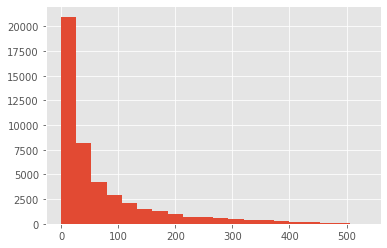

In [53]:
# 去除单元值
(order_diff/np.timedelta64(1,'D')).hist(bins=20)

结论：
- 订单周期呈指数分布
- 用户的平均购买周期是68天
- 绝大部分用户的购买周期都低于100天

In [54]:
u=user_life
# user_life=user_life.reset_index()
user_life=u

In [55]:
u

,min,max
user_id,,
1,1997-01-01,1997-01-01
2,1997-01-12,1997-01-12
3,1997-01-02,1998-05-28
4,1997-01-01,1997-12-12
5,1997-01-01,1998-01-03
...,...,...
23566,1997-03-25,1997-03-25
23567,1997-03-25,1997-03-25
23568,1997-03-25,1997-04-22


In [56]:
# 用户生命周期（按第一次和最后一次消费）
(user_life['max']-user_life['min']).describe()

count                       23570
mean     134 days 20:55:36.987696
std      180 days 13:46:43.039788
min               0 days 00:00:00
25%               0 days 00:00:00
50%               0 days 00:00:00
75%             294 days 00:00:00
max             544 days 00:00:00
dtype: object

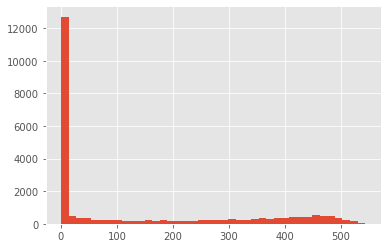

In [57]:
# Series.plot.hist()
# Series.hist() 用法上没啥区别。
((user_life['max']-user_life['min'])/np.timedelta64(1,"D")).hist(bins=40)

分析：
- 用户的生命周期受只购买一次的用户影响比较厉害（可以排除）
- 用户均消费134天，中位数仅0天

去掉极值：用户的生命周期受只购买一次的用户

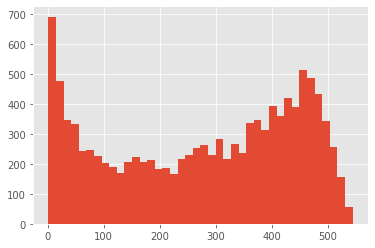

In [58]:
# 提取大于0的数据
u_1=(user_life['max']-user_life['min']).reset_index()[0]/np.timedelta64(1,"D")
u_1[u_1>0].hist(bins=40)


## 4.复购率和回购率分析
- 复购率
  - 自然月内，购买多次的用户占比(即，购买了两次以上)
- 回购率
  - 曾经购买过的用户在某一时期的再次购买的占比（可能是在三个月内）

### 计算复购率：

In [59]:
pivoted_counts = df.pivot_table(index="user_id",
                               columns="month",
                               values="order_dt",
                               aggfunc="count").fillna(0)

In [60]:
pivoted_counts.head(10)

month,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
user_id,,,,,,,,,,,,,,,,,,
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0
6,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
8,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
9,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [61]:
# 区分一个，和一个以上的情况，以便于计算复购率: 购买次数大于1表示为1，等于1为0, 等于0为np.NaN
def buy_more_than_1(x):
    if x > 1:
        return 1
    elif x == 1:
        return 0
    else:
        return np.NaN
    
purchase_r=pivoted_counts.applymap(buy_more_than_1)
purchase_r.head()

month,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
user_id,,,,,,,,,,,,,,,,,,
1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN
4,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
5,1.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN


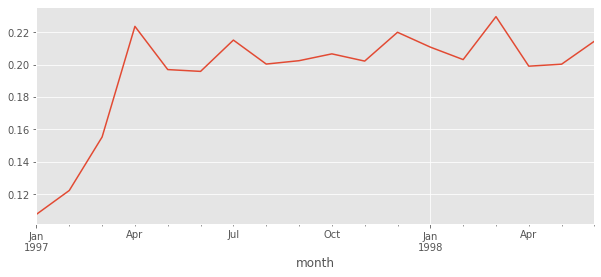

In [62]:
# 本月复购人数/本月消费人数（不会计算nan值）
(purchase_r.sum(axis=0)/purchase_r.count(axis=0)).plot(figsize=(10,4))

结论：
- 复购率稳定在20%所有，前一个月因为有大量新用户涌入，而这批用户只购买了一次，所以导致复购率降低

### 回购率，知道是否消费就可以了
- 有消费，标记1
- 无消费，标记0

In [63]:
df_purchase1 = pivoted_counts.applymap(lambda x : 1 if x >0 else 0)

In [64]:
df_purchase1.head()

month,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
user_id,,,,,,,,,,,,,,,,,,
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
5,1,1,0,1,1,1,1,0,1,0,0,1,1,0,0,0,0,0


In [65]:
# 需要使用函数来判断是否回购：当月消费过的用户下个月也消费了叫做回购，"这个定义可以改变"
def purchase_back(data):
    '''判断每一个月是否是回购，根据上个月是否购买来判断，上个月消费下个月没有购买就不是回购
       用i+1还是i-1，根据个人习惯和团队约定。
       当月消费，次月没有消费，当月值为0
       当月消费，次月有消费儿，当月值为1
       当月没有消费，        当月值为NaN
    '''
    status=[]
    for i in range(17):
        if data[i]==1:
            if data[i+1]==1:  
                status.append(1)
            if data[i+1]==0:
                status.append(0)
        else:
            status.append(np.NaN)
    # 第18个月补充NaN
    status.append(np.NaN)
    return status

In [114]:
pd.Series(df_purchase1.iloc[1], index=df_purchase1.columns)

month
1997-01-01    1
1997-02-01    0
1997-03-01    0
1997-04-01    0
1997-05-01    0
1997-06-01    0
1997-07-01    0
1997-08-01    0
1997-09-01    0
1997-10-01    0
1997-11-01    0
1997-12-01    0
1998-01-01    0
1998-02-01    0
1998-03-01    0
1998-04-01    0
1998-05-01    0
1998-06-01    0
Name: 2, dtype: int64

In [116]:
# 一行行的传递过去
purchase_b = df_purchase1.apply(lambda x : pd.Series(purchase_back(x),index=df_purchase1.columns),axis=1)
purchase_b.head()

month,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
user_id,,,,,,,,,,,,,,,,,,
1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN
4,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
5,1.0,0.0,NaN,1.0,1.0,1.0,0.0,NaN,0.0,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN


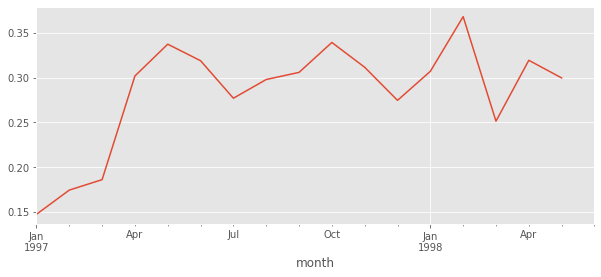

In [117]:
# 求得回购率，回购的次数除以总购买次数
(purchase_b.sum()/purchase_b.count()).plot(figsize=(10,4))